In [42]:
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt

scrape_questions_and_answers_df =  pl.read_parquet('../data/all_questions_and_answer.parquet')
scrape_questions_and_answers_new_df =  pl.read_parquet('../data/all_questions_and_answer_new.parquet')

## Data Analysis

We scraped 9941 questions and answers from Avvo.

In [13]:
scrape_questions_and_answers_df.group_by('number').len().shape[0]

9941

Number of valid scraped questions

In [19]:
scrape_questions_and_answers_df.filter(pl.col('title') != 'Not Found').group_by('number').len().shape[0]


3074

Number of invalid scraped questions

In [18]:
scrape_questions_and_answers_df.filter(pl.col('title') == 'Not Found').shape[0]

3074

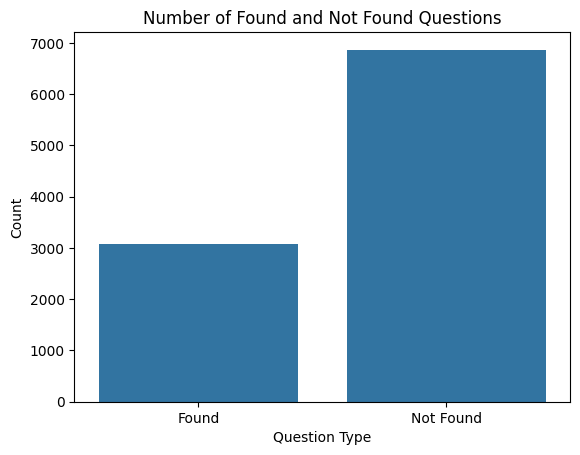

In [32]:
found_count = scrape_questions_and_answers_df.filter(pl.col('title') != 'Not Found').group_by('number').len().shape[0]
not_found_count = scrape_questions_and_answers_df.filter(pl.col('title') == 'Not Found').shape[0]

# Create a DataFrame with the counts
data = pl.DataFrame({
    'Question Type': ['Found', 'Not Found'],
    'Count': [found_count, not_found_count]
})

# Create the bar plot
sns.barplot(x='Question Type', y='Count', data=data)
plt.title('Number of Found and Not Found Questions')
plt.show()

<Axes: xlabel='posted_times', ylabel='len'>

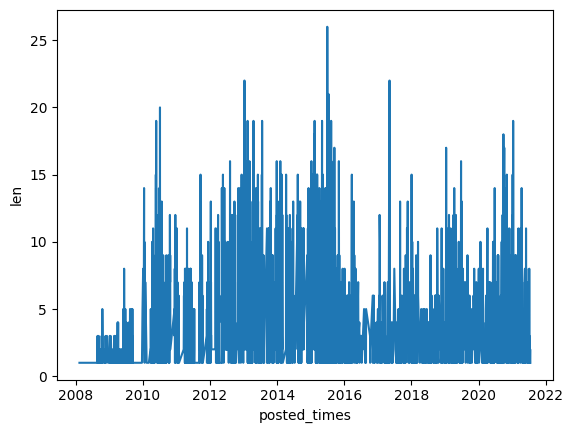

In [31]:
time_line_df = scrape_questions_and_answers_df.filter(pl.col('title') != 'Not Found').group_by('posted_times').len().sort('posted_times')

sns.lineplot(time_line_df, x='posted_times', y='len')

In [26]:
toscrape_df = scrape_questions_and_answers_df.filter(pl.col('title') != 'Not Found').select('number','url').unique().sort('number')

toscrape_df.with_row_index().filter(pl.col('number') == 229).select('index')[0,0]
#toscrape_df.filter(pl.col('number') == 229).
#toscrape_list_of_tuples = list(map(tuple, toscrape_df.to_numpy()))
#toscrape_list_of_tuples

229

In [43]:
truth_df = scrape_questions_and_answers_df.filter(pl.col('title') != 'Not Found').select('number','url').unique().sort('number')
new_df = scrape_questions_and_answers_new_df.filter(pl.col('title') != 'Not Found').select('number','url').unique().sort('number')
dict = truth_df.select('number','url').join(new_df.select('number','url'), on=['number','url'], how='anti').to_dict(as_series=False)
list(zip(dict['number'], dict['url']))

[(563,
  'https://www.avvo.com/legal-answers/can-you-amend-ch-7-bankruptcy-forms-after-filling--4180102.html'),
 (564,
  'https://www.avvo.com/legal-answers/how-can-i-resolve-this-financial-situation-in-the--4178447.html'),
 (565,
  'https://www.avvo.com/legal-answers/do-i-have-the-capability-to-sue-my-school-if-they--4170886.html'),
 (566,
  'https://www.avvo.com/legal-answers/california-bankruptcy-and-worker-s-comp-lump-sum-s-4169468.html'),
 (567,
  'https://www.avvo.com/legal-answers/i-know--i-know-it-was-so-foolish-of-me-not-to-reta-4162022.html'),
 (568,
  'https://www.avvo.com/legal-answers/i-have-a--debt--and-need-to-claim-b-k--i-also-just-4157933.html'),
 (569,
  'https://www.avvo.com/legal-answers/can-a-trustee-take-your-tax-refund-if-it-comes-aft-4157121.html'),
 (570,
  'https://www.avvo.com/legal-answers/i---m-in-the-process-of-filing-a-chapter7-bankrupt-4155812.html'),
 (571,
  'https://www.avvo.com/legal-answers/can-i--buy-or-return-by-car-if-car-lease-loan-has--4153903.